<a href="https://colab.research.google.com/github/onyansi254/WildfirePredictionChallenge/blob/main/WildfirePredictionChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.0 Import Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, minmax_scale

import warnings
warnings.filterwarnings('ignore')


**1.1 Data Loading**

*Train.csv*

In [19]:
path = "/content/WildfirePredictionChallenge/Train.csv"
Train = pd.read_csv(path)

In [25]:
display('Train_data',Train.head(5),
        'Train_shape',Train.shape)

'Train_data'

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


'Train_shape'

(83148, 29)

*Test_csv*

In [23]:
path2 = "/content/WildfirePredictionChallenge/Test.csv"
Test = pd.read_csv(path2)

In [28]:
pd.set_option('display.max_columns', None)
display('Test_data', Test.head(5), 'Test_shape', Test.shape)
pd.reset_option('display.max_columns')

'Test_data'

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2014-01-01,-15.858835,29.237029,1146,74,-451,1220,120,6,212,1974,0,217,303,2481,99,148,413.474762,0.0,0.000615,0.015418,0.0,0.416704,0.023724,0.530016,0.013524,0.0,0.404243
1,1_2014-01-01,-15.858835,29.487029,1118,98,-405,1216,117,6,330,1973,0,216,304,2481,100,143,429.034543,0.0,0.000000,0.000000,0.0,0.406436,0.000446,0.593118,0.000000,0.0,0.421489
2,2_2014-01-01,-15.858835,29.737029,1067,137,-468,1204,111,6,194,1958,0,214,302,2465,97,143,477.246432,0.0,0.000000,0.000000,0.0,0.254791,0.000000,0.745209,0.000000,0.0,0.419122
3,3_2014-01-01,-15.858835,29.987029,969,187,-533,1156,101,5,78,1954,0,202,290,2317,88,122,646.388681,0.0,0.000000,0.000000,0.0,0.219340,0.182153,0.598507,0.000000,0.0,0.404596
4,4_2014-01-01,-15.858835,30.237029,927,270,-505,1197,96,5,139,1939,0,210,301,2412,99,143,582.340637,0.0,0.000000,0.000000,0.0,0.220239,0.097748,0.682013,0.000000,0.0,0.371100


'Test_shape'

(25584, 28)

**Conclusion **

.Train dataset has 83148 rows while test dataset has 25584
rows.

.Test has one less column - burn_area is missing

**2.0 Checking missing values**

In [29]:
Train.isna().sum()

ID               0
lat              0
lon              0
burn_area        0
climate_aet      0
climate_def      0
climate_pdsi     0
climate_pet      0
climate_pr       0
climate_ro       0
climate_soil     0
climate_srad     0
climate_swe      0
climate_tmmn     0
climate_tmmx     0
climate_vap      0
climate_vpd      0
climate_vs       0
elevation        0
landcover_0      0
landcover_1      0
landcover_2      0
landcover_3      0
landcover_4      0
landcover_5      0
landcover_6      0
landcover_7      0
landcover_8      0
precipitation    0
dtype: int64

There is no missing values

**2.1 Checking Duplicates**

In [30]:
Train.duplicated().sum()

0

There is no duplicate

**3.0 Checking statistics of the Train.CSV**

In [31]:
Train.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,...,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,...,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,...,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,...,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


**4.0 Exploring Train Data**

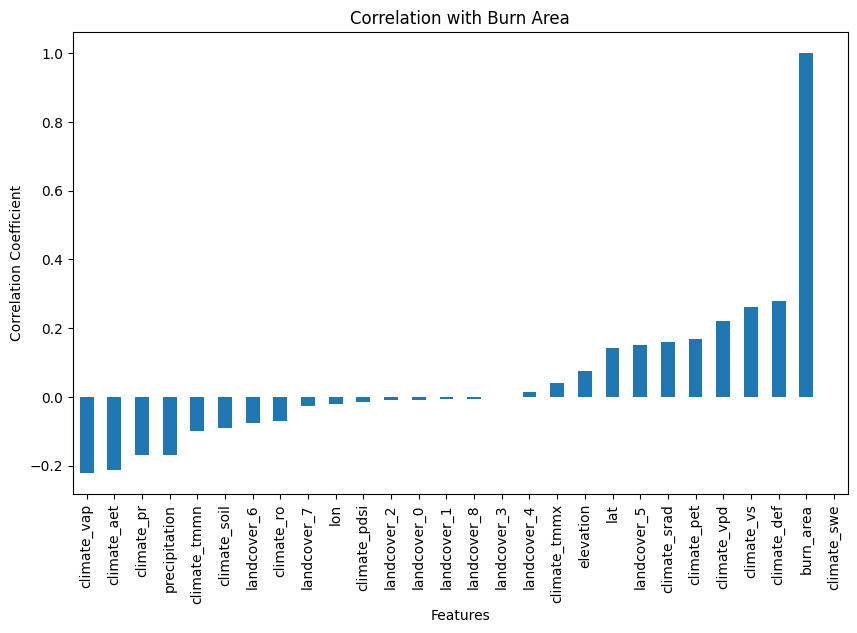

In [34]:
numerical_data = Train.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
burn_area_correlation = correlation_matrix['burn_area']
sorted_correlation = burn_area_correlation.sort_values()

#Bar plot
plt.figure(figsize=(10, 6))
sorted_correlation.plot(kind='bar')
plt.title('Correlation with Burn Area')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


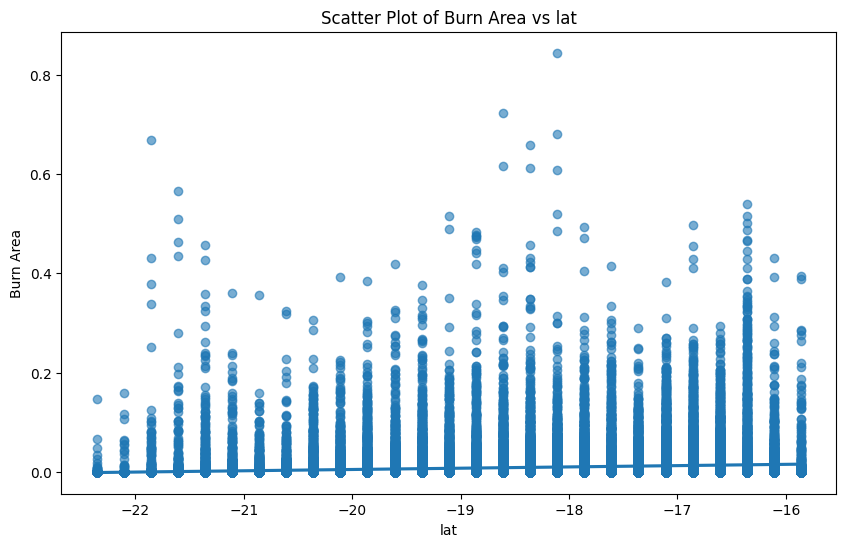

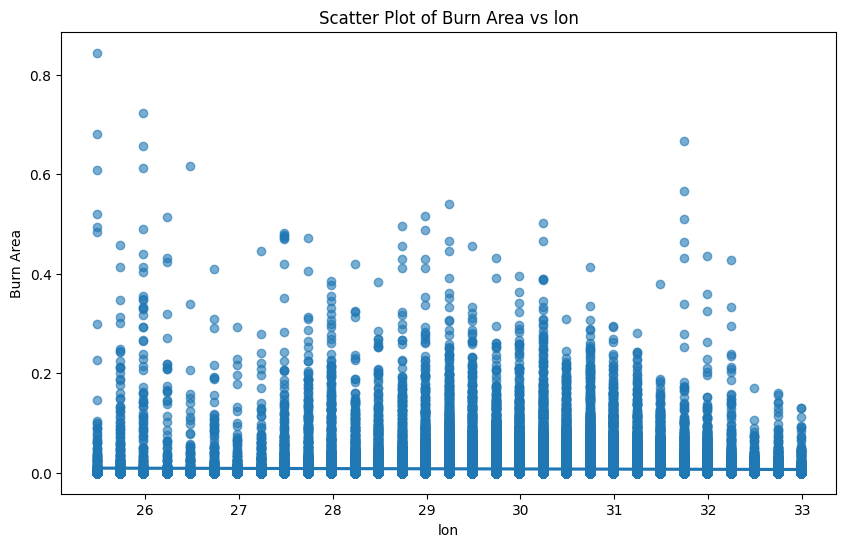

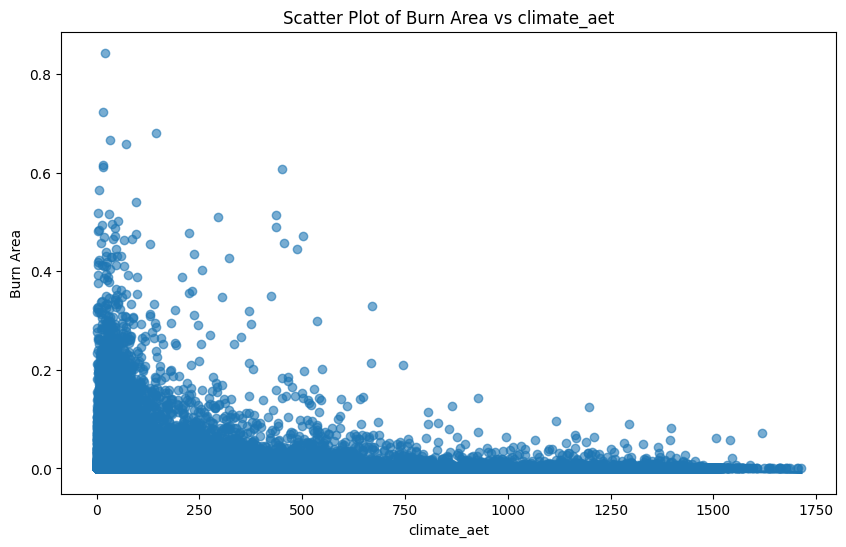

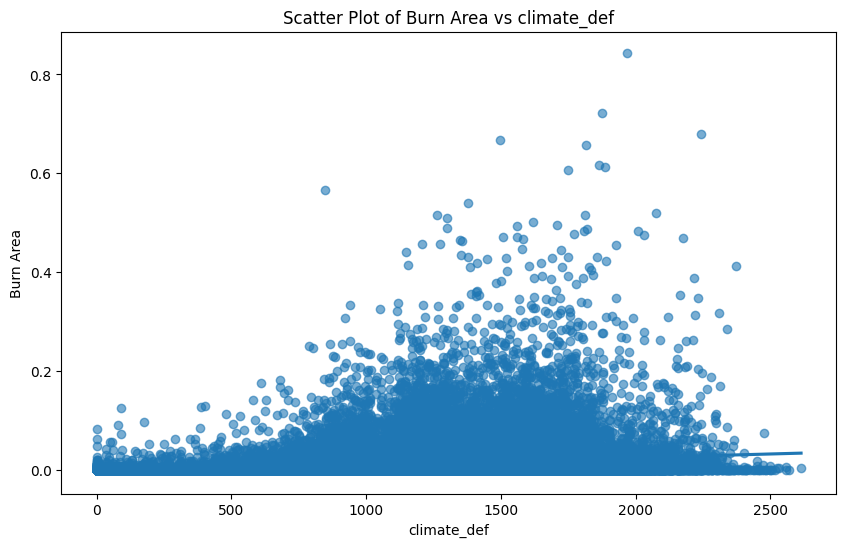

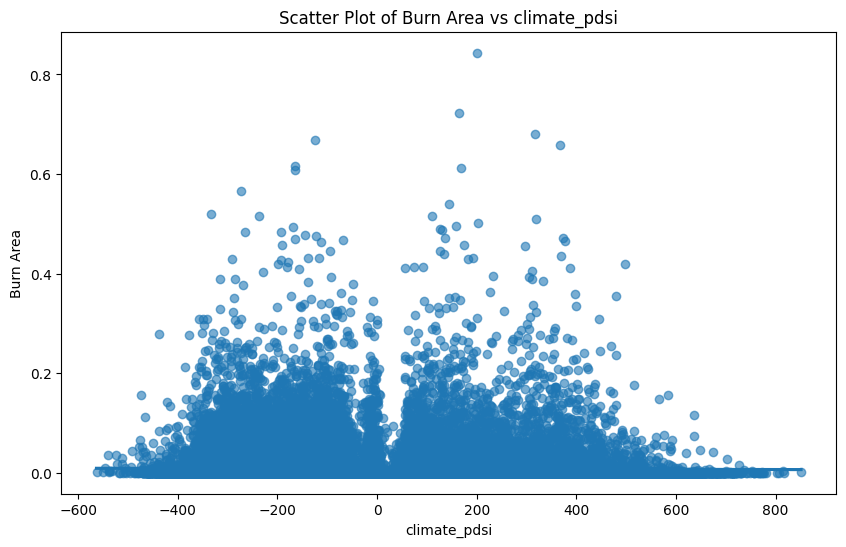

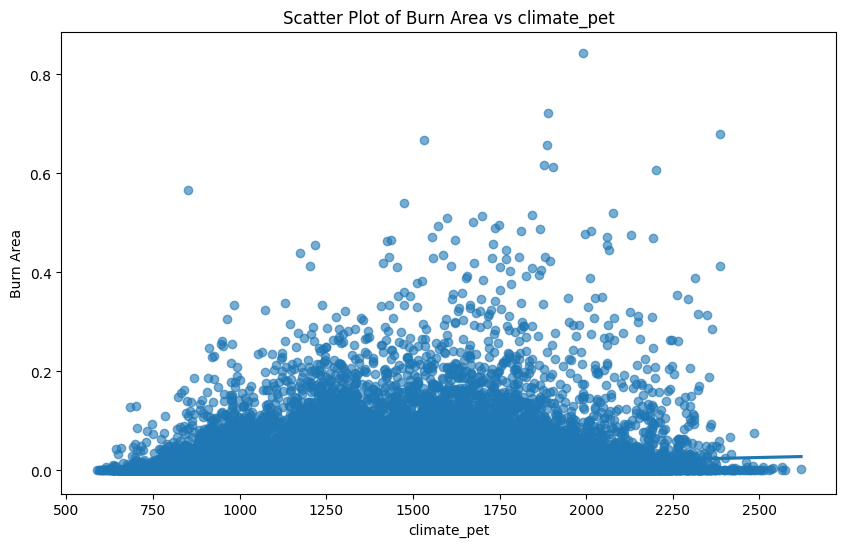

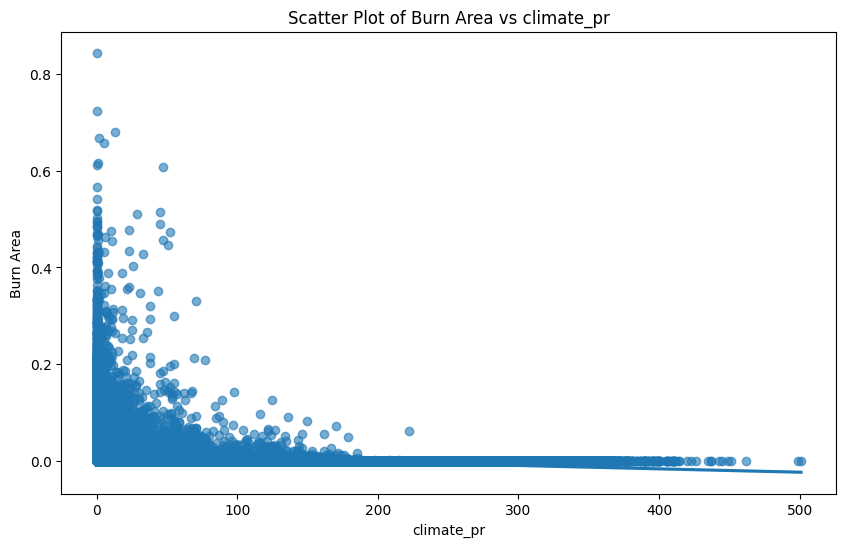

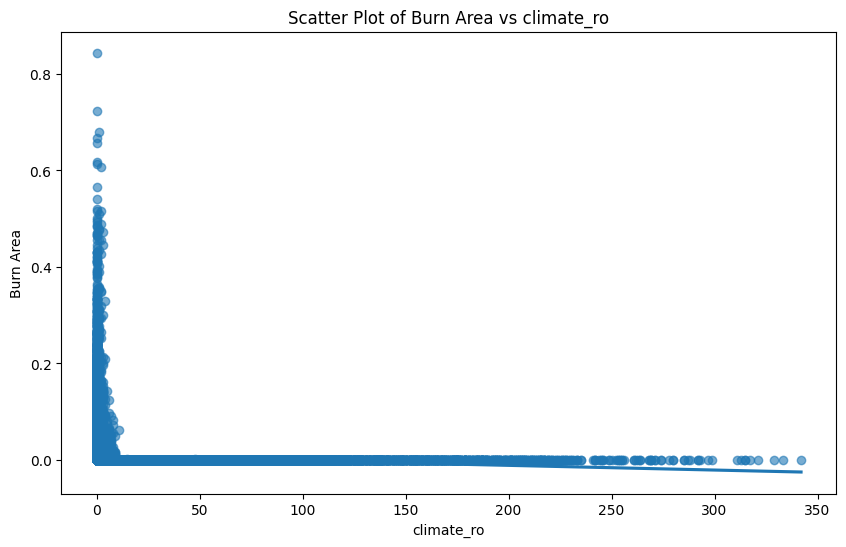

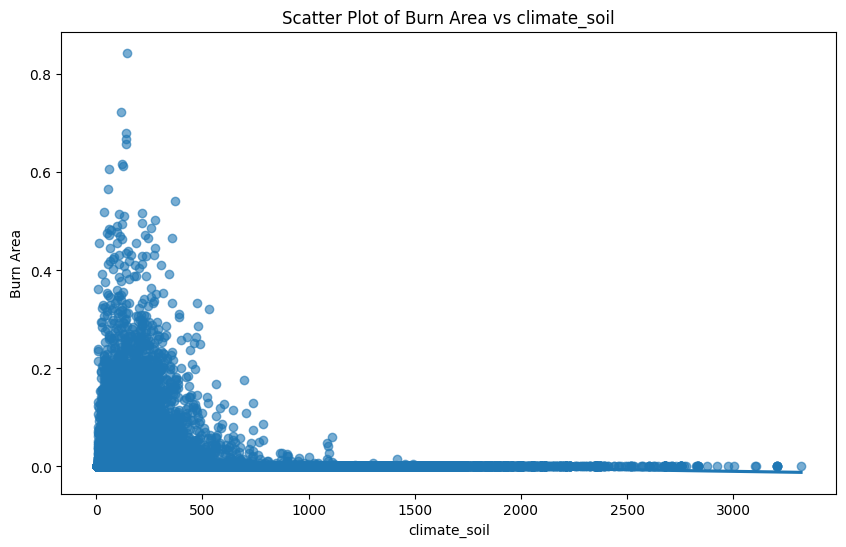

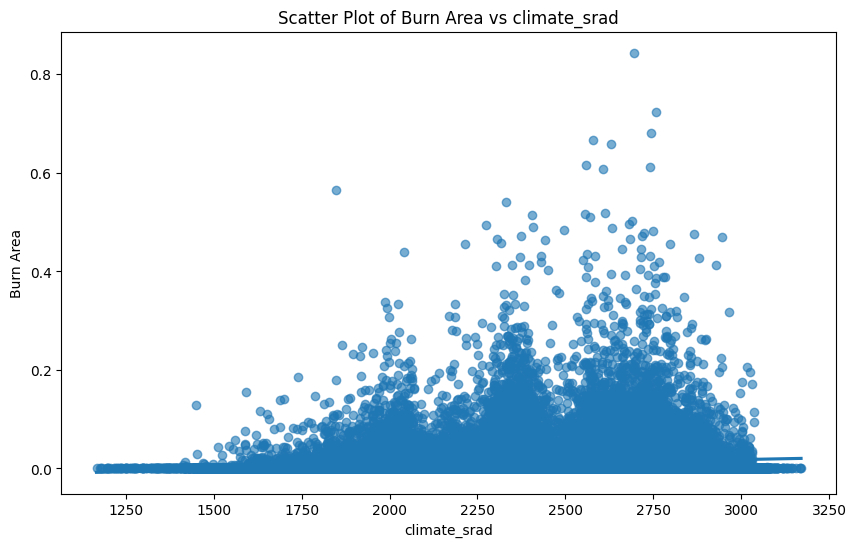

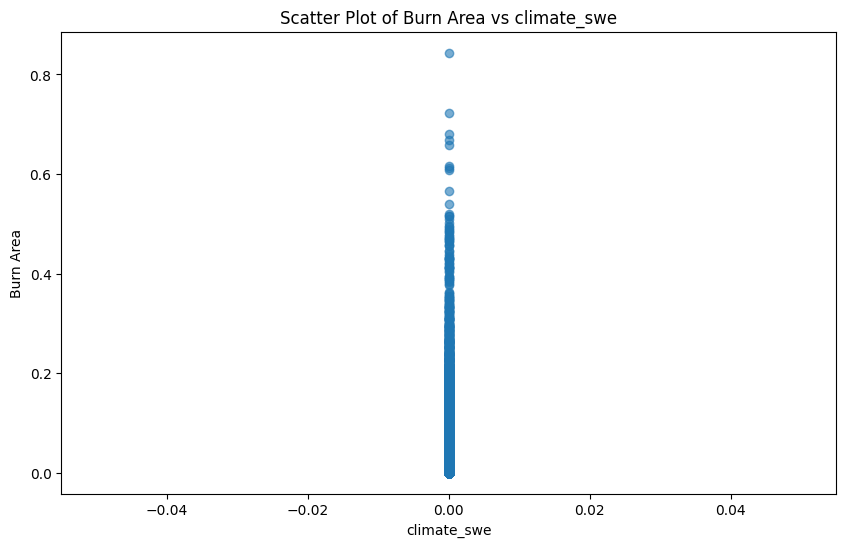

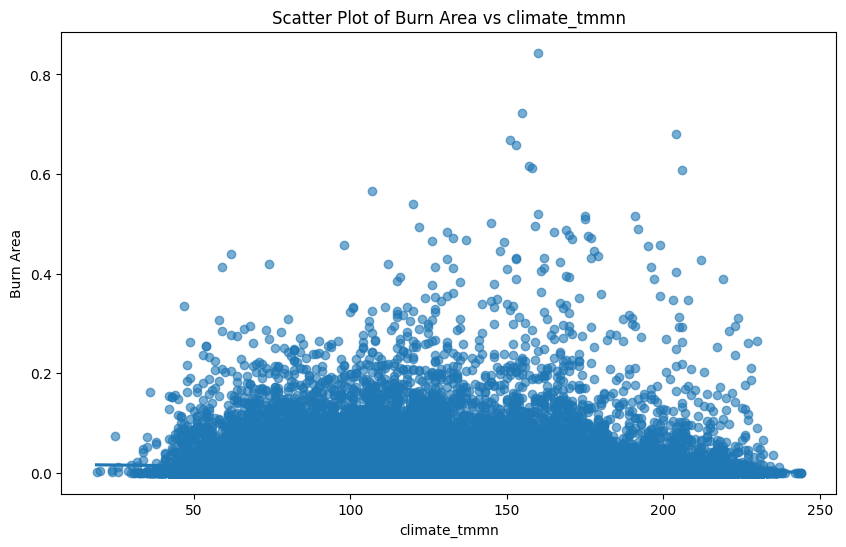

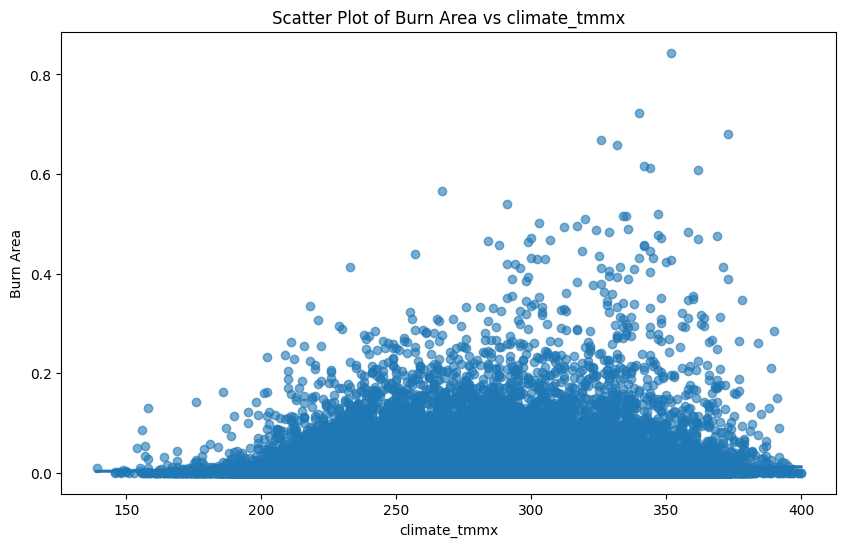

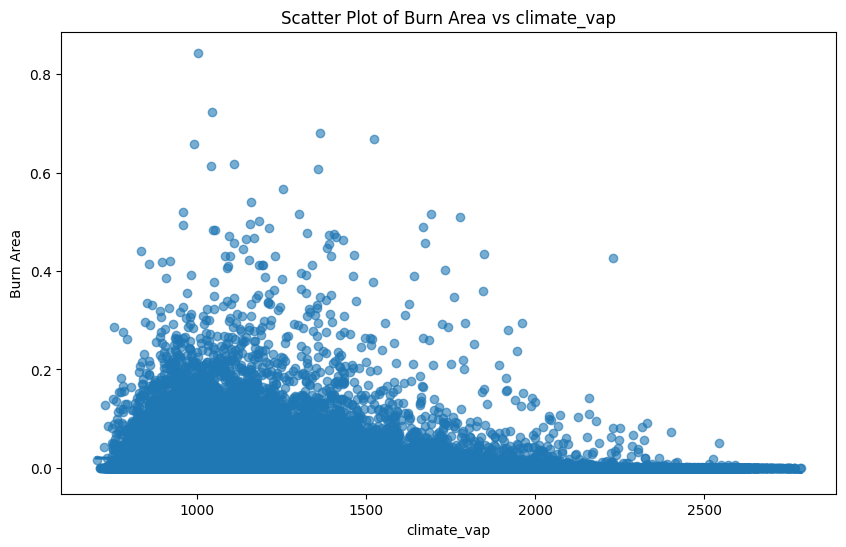

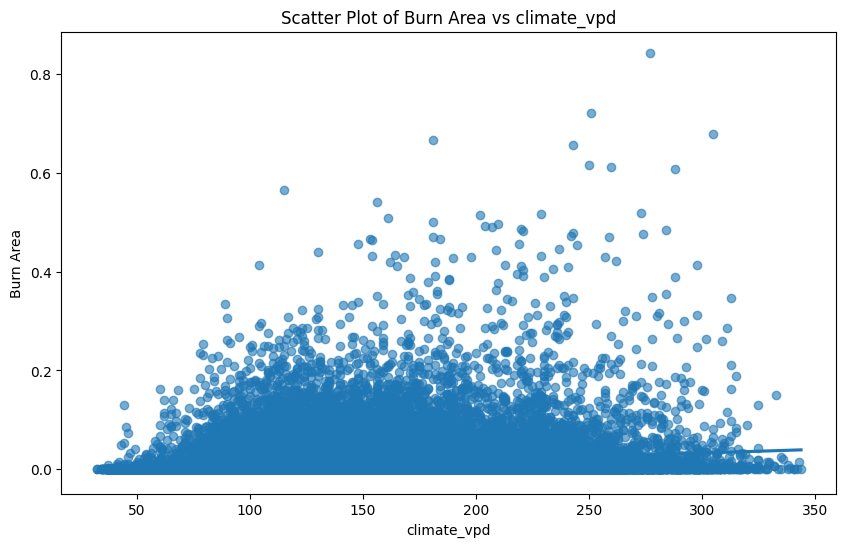

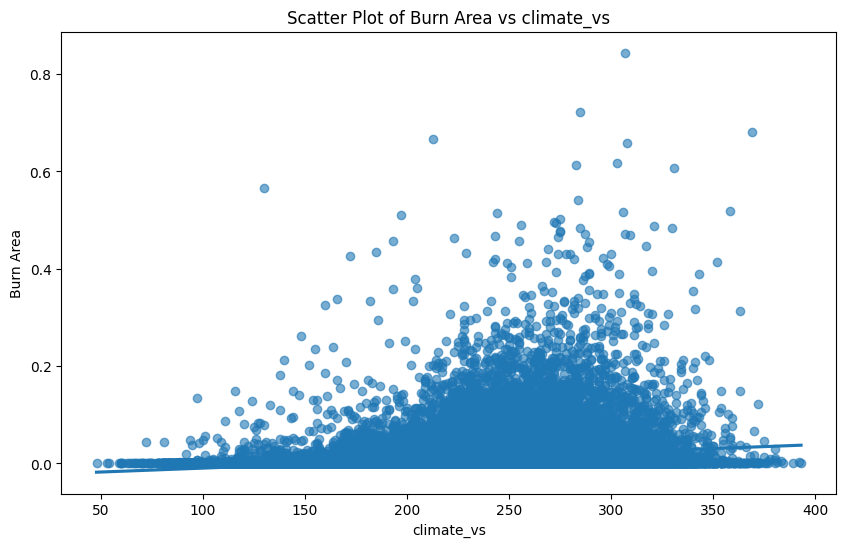

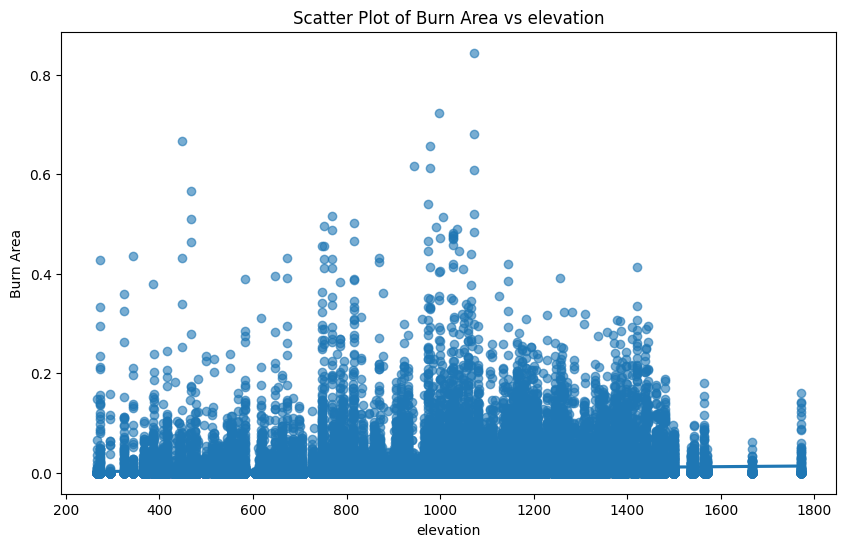

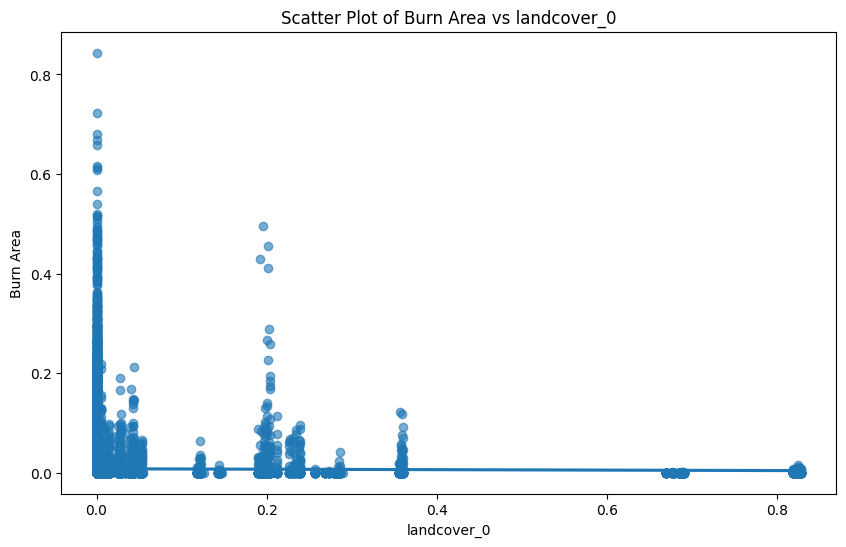

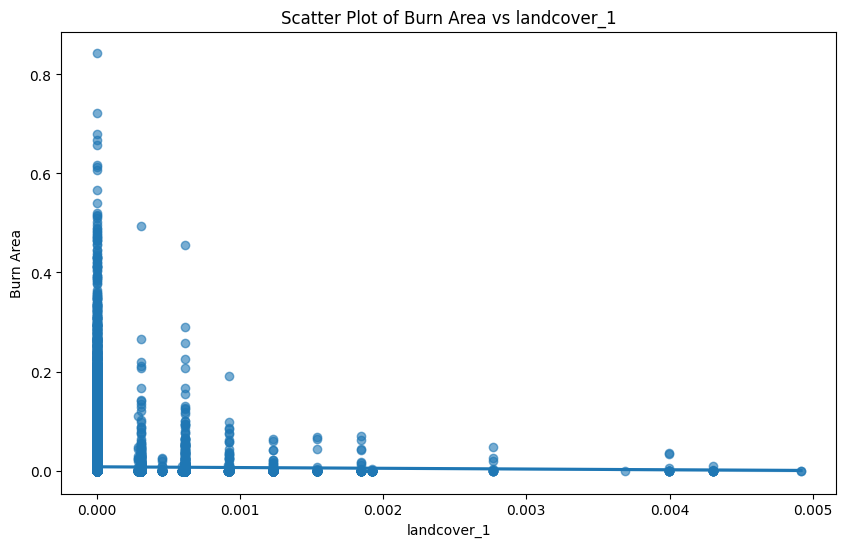

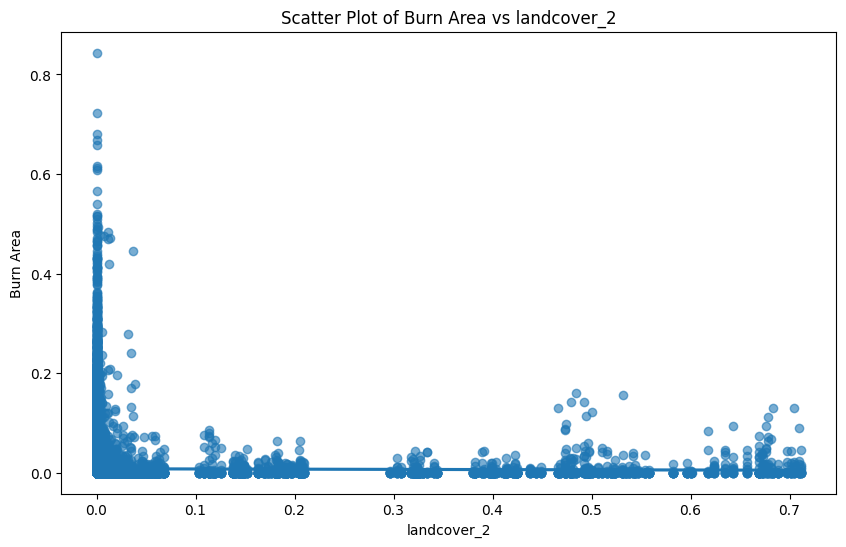

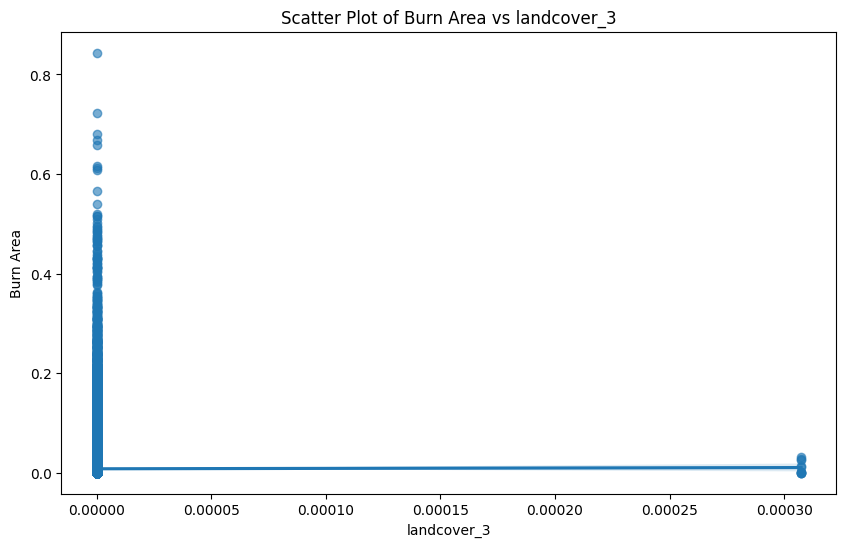

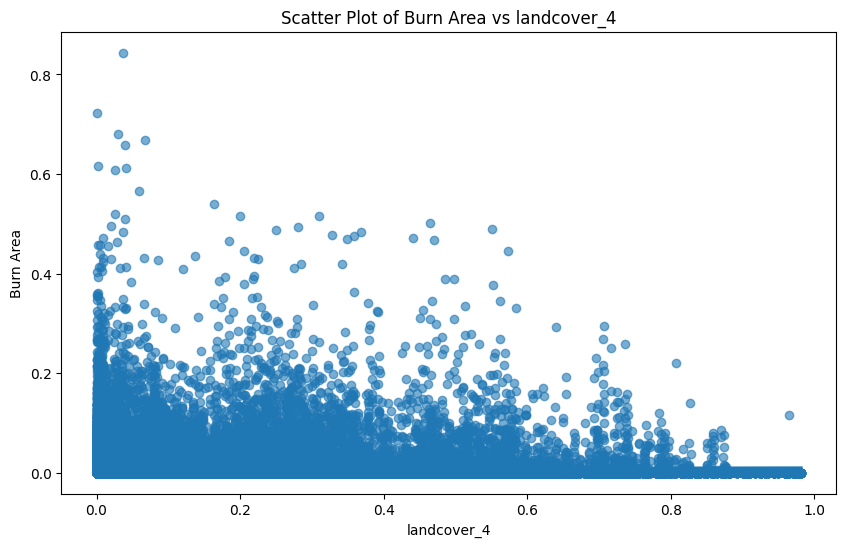

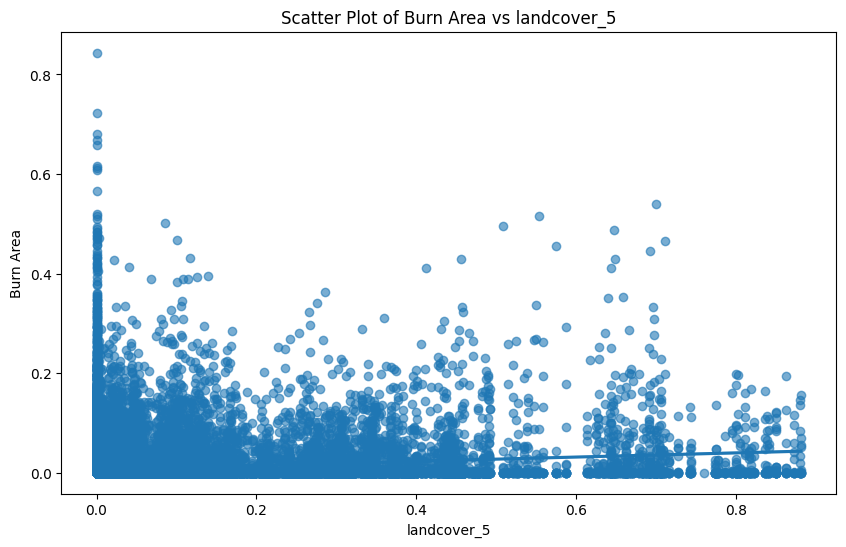

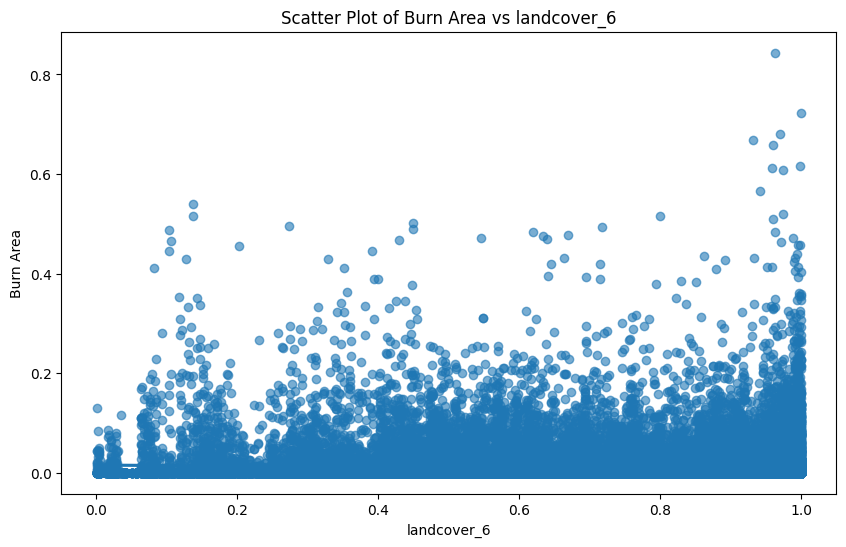

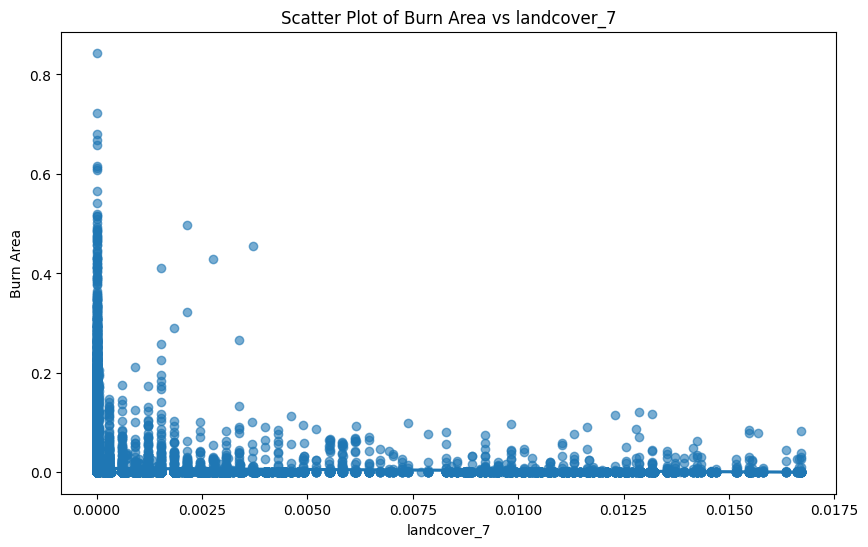

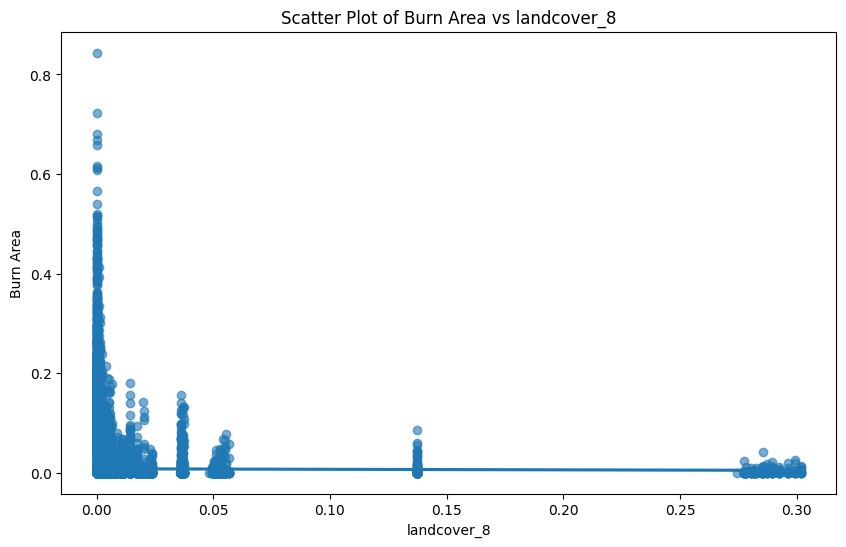

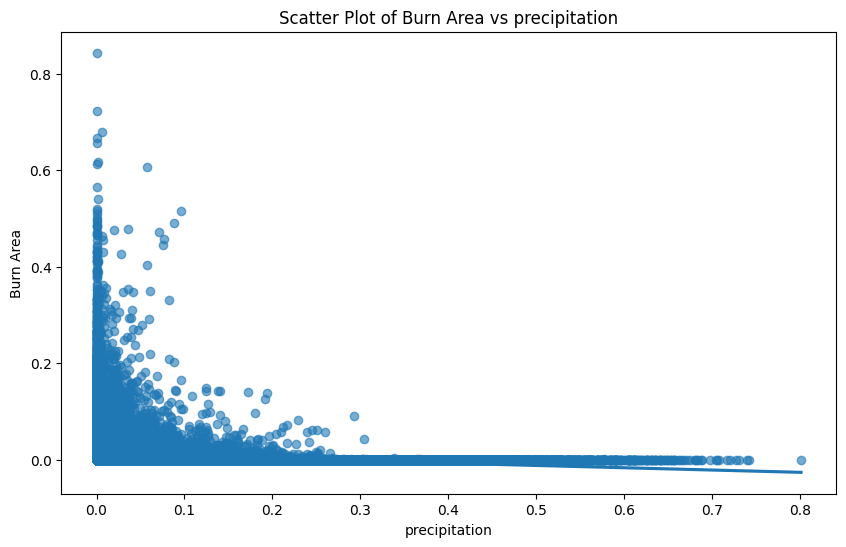

In [36]:
#Scatter plots
numerical_features = Train.select_dtypes(include=['number']).columns.drop('burn_area')

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=Train[feature], y=Train['burn_area'], scatter_kws={'alpha':0.6})
    plt.title(f'Scatter Plot of Burn Area vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Burn Area')
    plt.show()


In [38]:
#!git clone https://github.com/onyansi254/WildfirePredictionChallenge.git
%cd WildfirePredictionChallenge



[Errno 2] No such file or directory: 'WildfirePredictionChallenge'
/content/WildfirePredictionChallenge


In [39]:
!git config --global user.name "Richard Otwoma"
!git config --global user.email "ronyansi11@gmail.com"


In [40]:
!git add .
!git commit -m "Done all upto visualization"
!git push origin main


[main (root-commit) ced8b92] Done all upto visualization
 6 files changed, 138172 insertions(+)
 create mode 100644 Fighting_Fire_with_Data_Starter_Notebook.ipynb
 create mode 100644 SampleSubmission.csv
 create mode 100644 Test.csv
 create mode 100644 Train.csv
 create mode 100644 manifest-fbb1bd216f5235db2b1e3bcb3ad31c2620240716-19716-1lstrqd.json
 create mode 100644 variable_definitions.csv
fatal: could not read Username for 'https://github.com': No such device or address
